<a href="https://colab.research.google.com/github/saatvik1879/springcamp/blob/main/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import random
import torch
from PIL import Image,ImageChops,ImageTransform
import torchvision.transforms.functional as transform
from sklearn.utils import shuffle
from pathlib import Path
from torch import nn
import matplotlib.pyplot as plt
device='cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
import torchvision.transforms as T

In [47]:
import os

# Specify the folder path (replace 'your_folder_path' with the actual folder path)
folder_path = '/content/drive/MyDrive/Chess/Rook'

# Use os.listdir to get a list of all files in the folder
all_files = os.listdir(folder_path)

# Filter only image files based on file extensions
image_extensions = ['.jpg', '.png', '.jpeg','.JPG','.gif']  # Add more extensions if needed
image_paths = [os.path.join(folder_path, file) for file in all_files if any(file.endswith(ext) for ext in image_extensions)]

# Display the list of image paths
print(image_paths)


['/content/drive/MyDrive/Chess/Rook/00000033.jpg', '/content/drive/MyDrive/Chess/Rook/00000054.jpg', '/content/drive/MyDrive/Chess/Rook/00000097.jpg', '/content/drive/MyDrive/Chess/Rook/00000053.jpg', '/content/drive/MyDrive/Chess/Rook/00000003.JPG', '/content/drive/MyDrive/Chess/Rook/00000086.jpg', '/content/drive/MyDrive/Chess/Rook/00000189.jpg', '/content/drive/MyDrive/Chess/Rook/00000120.jpg', '/content/drive/MyDrive/Chess/Rook/00000015.jpg', '/content/drive/MyDrive/Chess/Rook/00000011.jpg', '/content/drive/MyDrive/Chess/Rook/00000031.jpg', '/content/drive/MyDrive/Chess/Rook/00000050.jpg', '/content/drive/MyDrive/Chess/Rook/00000185.jpg', '/content/drive/MyDrive/Chess/Rook/00000160.jpg', '/content/drive/MyDrive/Chess/Rook/00000005.jpg', '/content/drive/MyDrive/Chess/Rook/00000006.jpg', '/content/drive/MyDrive/Chess/Rook/00000004.jpg', '/content/drive/MyDrive/Chess/Rook/00000016.jpg', '/content/drive/MyDrive/Chess/Rook/00000114.jpg', '/content/drive/MyDrive/Chess/Rook/00000074.jpg',

In [29]:
def read_image(path)->torch.Tensor:
  pil_image=Image.open(path)
  pil_image = pil_image.convert("L")
  pil_image = pil_image.resize((28, 28))
  torch_tensor=transform.to_tensor(pil_image)
  torch_tensor = torch.unsqueeze(torch_tensor,0)
  return torch_tensor

In [38]:
# final_tensor = read_image(image_paths[0])
# for i in image_paths[1:]:
#   imge = read_image(i)
#   final_tensor = torch.cat((final_tensor,imge))
# final_tensor.shape

torch.Size([87, 1, 28, 28])

In [48]:
for i in image_paths:
  imge = read_image(i)
  final_tensor = torch.cat((final_tensor,imge))
final_tensor.shape

torch.Size([552, 1, 28, 28])

In [50]:
torch.save(final_tensor,'/content/train2.pth')

In [51]:
training_tensor = torch.load('/content/train2.pth')

In [52]:
training_tensor.shape

torch.Size([552, 1, 28, 28])

In [53]:
class auto_encoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder = nn.Sequential(
            torch.nn.Linear(28 * 28, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 9)
            )
    self.decoder = torch.nn.Sequential(
            torch.nn.Linear(9, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 28 * 28),
            torch.nn.Sigmoid()
        )
  def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [104]:
torch.manual_seed(42)
model0 = auto_encoder().to(device)

training_tensor = training_tensor.to(device)

In [110]:
lossfn = nn.MSELoss()
optimizer = torch.optim.SGD(params=model0.parameters(),lr = 0.3)


In [106]:
training_tensor = training_tensor.reshape((-1,28*28))

In [117]:
losslst = []

In [118]:
epochs=1000

for epoch in range(epochs):
    model0.train()
    loss=lossfn(model0(training_tensor),training_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model0.eval()
    if epoch%10 == 9:
      losslst.append(loss.cpu().detach().numpy())

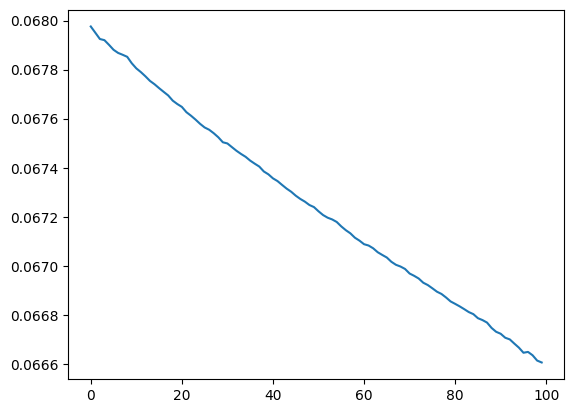

In [119]:
plt.plot(losslst)

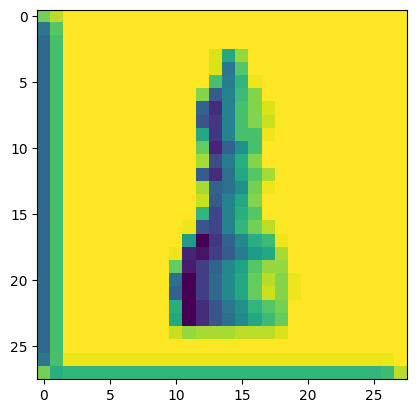

In [120]:
with torch.inference_mode():
  ypred = model0(training_tensor)
ypred = ypred.cpu().detach().numpy()
x = training_tensor.cpu().detach().numpy()
x = x.reshape(-1, 28, 28)
plt.imshow(x[0])


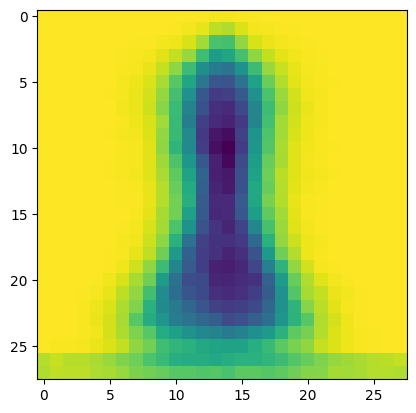

In [126]:
ypred = ypred.reshape(-1, 28, 28)
plt.imshow(ypred[0])